# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [4]:
def custom_svd(M, debug=False):

    M = np.array(M)

    m_rank = np.linalg.matrix_rank(M)

    #print('Rank', m_rank)
    
    m_transpose_m = M.T @ M

    #print('Dtype of mTm', m_transpose_m.dtype)

    eigenvalues, eigenvectors = np.linalg.eig(m_transpose_m)

    eigenvalues = np.real(eigenvalues[:m_rank])
    singular_values = np.sqrt(eigenvalues) 
    sigma = np.diag(singular_values)

    sigma = np.real(sigma)

    #print('Dtype of sigma', sigma.dtype)

    v = eigenvectors[:,:m_rank]

    v = np.real(v)

    #print('Dtype of eigenvectors', v.dtype)

    u_cols = []
    for i in range(v.shape[1]):
        curr_u_col = (1 / eigenvalues[i]) * (M @ v[:,i])
        norm = np.linalg.norm(curr_u_col)
        u_cols.append(curr_u_col / norm)

    u = np.column_stack(tuple(u_cols))

    #print('Dtype of u', u.dtype)
    

    return u, sigma, v.T


def apply_svd_custom(X_train, X_test, n_components):
    
    u_train, sigma_train, vt_train = custom_svd(X_train)
    u_train = u_train[:,:n_components]
    sigma_train = sigma_train[:n_components,:n_components]
    vt_train = vt_train[:n_components]

    decom_train = u_train @ sigma_train @ vt_train


    u_test, sigma_test, vt_test = custom_svd(X_test, debug=True)
    u_test = u_test[:,:n_components]
    sigma_test = sigma_test[:n_components,:n_components]
    vt_test = vt_test[:n_components]

    decom_test = u_test @ sigma_test @ vt_test


    return decom_train, decom_test

    

In [5]:
M = np.array(
    [
        [1,2,3],
        [5,2,7],
        [3,9,1]
    ]
)

u,s,vt = np.linalg.svd(M, full_matrices=False)

print(np.diag(s))

[[11.6908693   0.          0.        ]
 [ 0.          6.71314615  0.        ]
 [ 0.          0.          1.12126887]]


## Part 3: Train Logistic Regression and Measure Performance

In [6]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')
    
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [8]:
svd_components = [784, 500, 350, 200, 100, 75, 50, 25, 10]  # You need to decide what number to search...

# Store the results
results = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")

    # Apply SVD to the training and test sets
    # Call apply_svd_custom() here...
    X_train_svd, X_test_svd = apply_svd_custom(X_train, X_test, n_components)
    
    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)

    results.append((accuracy, training_time))
        
    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")


Training models with different levels of SVD preprocessing...
Applying custom SVD with 784 components...


/Users/seanmccarty/Desktop/cs 506/mccartys-assignment-3/myenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 784, Accuracy: 0.9209, Training time: 395.1859 seconds
Applying custom SVD with 500 components...


/Users/seanmccarty/Desktop/cs 506/mccartys-assignment-3/myenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 500, Accuracy: 0.9206, Training time: 370.5704 seconds
Applying custom SVD with 350 components...


/Users/seanmccarty/Desktop/cs 506/mccartys-assignment-3/myenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 350, Accuracy: 0.9197, Training time: 314.1491 seconds
Applying custom SVD with 200 components...


/Users/seanmccarty/Desktop/cs 506/mccartys-assignment-3/myenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 200, Accuracy: 0.9205, Training time: 305.6165 seconds
Applying custom SVD with 100 components...


/Users/seanmccarty/Desktop/cs 506/mccartys-assignment-3/myenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 100, Accuracy: 0.9171, Training time: 234.9503 seconds
Applying custom SVD with 75 components...


/Users/seanmccarty/Desktop/cs 506/mccartys-assignment-3/myenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 75, Accuracy: 0.9154, Training time: 165.6141 seconds
Applying custom SVD with 50 components...


/Users/seanmccarty/Desktop/cs 506/mccartys-assignment-3/myenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 50, Accuracy: 0.9069, Training time: 99.7266 seconds
Applying custom SVD with 25 components...


/Users/seanmccarty/Desktop/cs 506/mccartys-assignment-3/myenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 25, Accuracy: 0.8861, Training time: 36.5965 seconds
Applying custom SVD with 10 components...


/Users/seanmccarty/Desktop/cs 506/mccartys-assignment-3/myenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 10, Accuracy: 0.8017, Training time: 16.0606 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


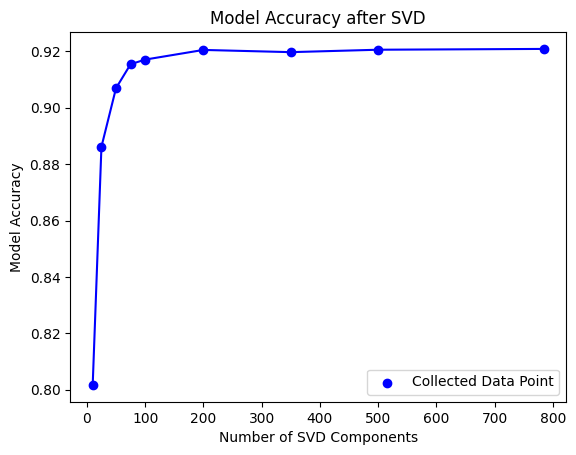

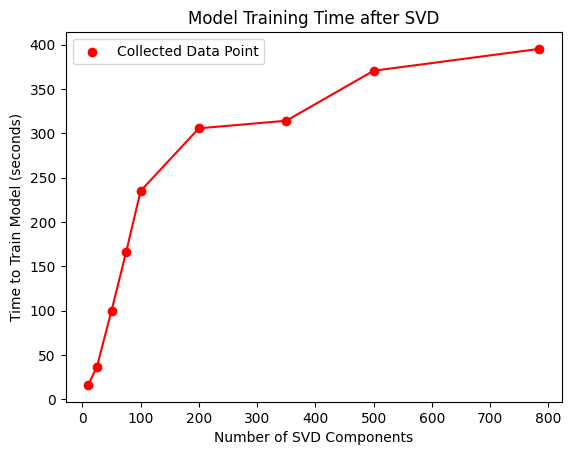

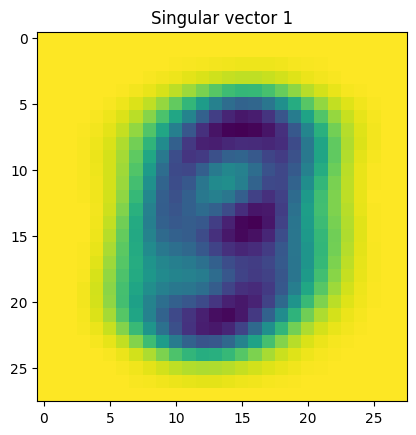

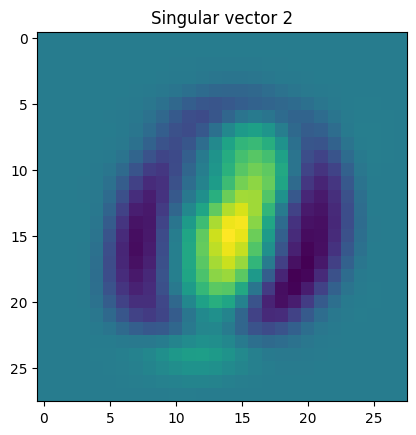

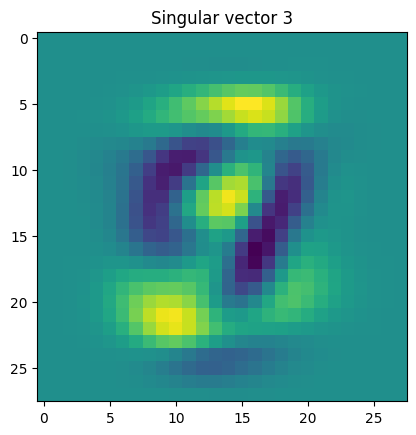

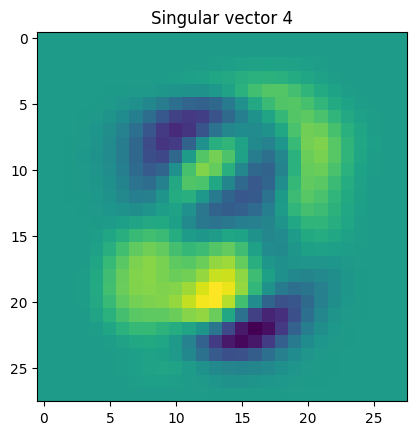

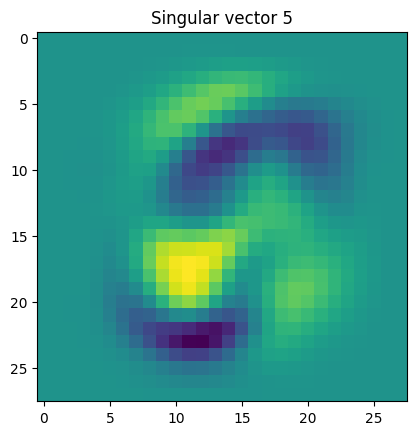

In [35]:
## Your implementation here...
## You may add necessary lines in Part 4 to access data for visualization

# Plot for accuracy 
plt.scatter(svd_components, [acc for acc, time in results], color="blue", label="Collected Data Point")
plt.plot(svd_components, [acc for acc, time in results], color="blue", linestyle="-")
plt.xlabel("Number of SVD Components")
plt.ylabel("Model Accuracy")
plt.title("Model Accuracy after SVD")
plt.legend()
plt.show()

# Plot for model training time
plt.scatter(svd_components, [time for acc, time in results], color="red", label="Collected Data Point")
plt.plot(svd_components, [time for acc, time in results], color="red", linestyle="-")
plt.xlabel("Number of SVD Components")
plt.ylabel("Time to Train Model (seconds)")
plt.title("Model Training Time after SVD")
plt.legend()
plt.show()

# Plot singular vectors
_, _, vt = custom_svd(X_train)

for i in range(5):
    img = vt[i].reshape((28, 28))
    plt.title(f"Singular vector {i + 1}")
    plt.imshow(img)
    plt.show()

## Part 6: Analyze / Conclusion

It seems that decreasing the number of SVD components slightly decreases the accuracy of the logistic regression model on this particular data set. However, the speed at which the model was trained greatly decreases comparatively to the decrease in accuracy for lesser SVD components. Overall, the accuracy of the model is roughly the same for greater than 100 svd components, while the time to train is alm